In [1]:
!gdown "1CEbe-1dTjEzbMqFqrLcZGmdK8luuKcUw"

Downloading...
From (original): https://drive.google.com/uc?id=1CEbe-1dTjEzbMqFqrLcZGmdK8luuKcUw
From (redirected): https://drive.google.com/uc?id=1CEbe-1dTjEzbMqFqrLcZGmdK8luuKcUw&confirm=t&uuid=9419a94c-3f9c-4360-a755-0ed0c738494e
To: /content/archive (3).zip
100% 84.9M/84.9M [00:01<00:00, 77.3MB/s]


In [2]:
!unzip "/content/archive (3).zip"

Archive:  /content/archive (3).zip
  inflating: training.1600000.processed.noemoticon.csv  


In [3]:
import pandas as pd
data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data = data.iloc[:, [0, 5]]
data.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
print(data.iloc[:, 0].unique())

[0 4]


In [7]:
mask = data.iloc[:, 0] != 0
data = data[mask]
data.reset_index(drop=True, inplace=True)
data.head()

,0,5
0,4,I LOVE @Health4UandPets u guys r the best!!
1,4,im meeting up with one of my besties tonight! ...
2,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,Being sick can be really cheap when it hurts t...
4,4,@LovesBrooklyn2 he has that effect on everyone


In [8]:
data = data.iloc[: , [1]]
data.head()

,5
0,I LOVE @Health4UandPets u guys r the best!!
1,im meeting up with one of my besties tonight! ...
2,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,Being sick can be really cheap when it hurts t...
4,@LovesBrooklyn2 he has that effect on everyone


In [9]:
import re

def remove_a(txt):

    cleaned_text = re.sub(r'[@#][^ \t\r\n]+', '', txt)

    return cleaned_text


def remove_url(txt):

    tokenized_txt = txt.split()
    url = re.compile(r'https?://\S+|www\.\S+')

    for each_word in range(len(tokenized_txt)):
      tokenized_txt[each_word] = url.sub(r'', tokenized_txt[each_word])

    return " ".join(tokenized_txt)


def normalize_sentence(txt):
    '''
    Aggregates all the above functions to normalize/clean a sentence
    '''

    nourl = remove_url(txt)

    nopunc = remove_a(nourl)

    return nopunc

# TODO: Clean the sentences
data[5] = data[5].apply(normalize_sentence)

In [10]:
data.tail()

,5
799995,Just woke up. Having no school is the best fee...
799996,TheWDB.com - Very cool to hear old Walt interv...
799997,Are you ready for your MoJo Makeover? Ask me f...
799998,Happy 38th Birthday to my boo of alll time!!! ...
799999,happy


In [11]:
sample = data.sample(n=800)
sample.to_csv("neutral.csv", index=False)

In [12]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("nbertagnolli/counsel-chat")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/2775 [00:00<?, ? examples/s]

In [13]:
print(dataset.column_names)

{'train': ['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views']}


In [14]:
data2 = pd.DataFrame(dataset['train'])

In [15]:
data2.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,It is very common for people to have multiple ...,3,1971
1,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Jason Lynch, MS, LMHC, LCAC, ADSIndividual & C...",https://counselchat.com/therapists/jason-lynch...,"I've never heard of someone having ""too many i...",2,386
2,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Shakeeta TorresFaith Based Mental Health Couns...,https://counselchat.com/therapists/shakeeta-to...,Absolutely not. I strongly recommending worki...,2,3071
3,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Mich...",https://counselchat.com/therapists/noorayne-ch...,Let me start by saying there are never too man...,2,2643
4,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Toni Teixeira, LCSWYour road to healing begins...",https://counselchat.com/therapists/toni-teixei...,I just want to acknowledge you for the courage...,1,256


In [16]:
data2 = data2.iloc[:, [2, 4]]
data2.head()

,questionText,topic
0,I have so many issues to address. I have a his...,depression
1,I have so many issues to address. I have a his...,depression
2,I have so many issues to address. I have a his...,depression
3,I have so many issues to address. I have a his...,depression
4,I have so many issues to address. I have a his...,depression


In [17]:
print(data2.iloc[:, 1].unique())

['depression' 'anxiety' 'parenting' 'self-esteem'
 'relationship-dissolution' 'workplace-relationships' 'spirituality'
 'trauma' 'domestic-violence' 'anger-management' 'sleep-improvement'
 'intimacy' 'grief-and-loss' 'substance-abuse' 'family-conflict'
 'marriage' 'eating-disorders' 'relationships' 'lgbtq' 'behavioral-change'
 'addiction' 'legal-regulatory' 'professional-ethics' 'stress'
 'human-sexuality' 'social-relationships' 'children-adolescents'
 'military-issues' 'self-harm' 'diagnosis' 'counseling-fundamentals']


In [18]:
data2 = data2.drop_duplicates()
data2.reset_index(drop=True, inplace=True)
label_counts = data2['topic'].value_counts()
print(label_counts)

topic
depression                  138
intimacy                    109
relationships               105
anxiety                     101
family-conflict              61
parenting                    55
self-esteem                  43
relationship-dissolution     34
behavioral-change            32
anger-management             27
trauma                       25
marriage                     20
domestic-violence            16
lgbtq                        16
social-relationships         13
workplace-relationships      12
substance-abuse              11
grief-and-loss               10
spirituality                  8
professional-ethics           7
legal-regulatory              7
counseling-fundamentals       7
eating-disorders              6
addiction                     5
human-sexuality               5
sleep-improvement             5
diagnosis                     4
stress                        3
children-adolescents          2
military-issues               1
self-harm                     1
Na

In [19]:
label_mapping = ({'counseling-fundamentals' : 'sad', 'intimacy' : 'sad', 'relationships' : 'sad', 'family-conflict' : 'sad', 'parenting' : 'sad',
                  'self-esteem' : 'depression', 'relationship-dissolution' : 'sad', 'behavioral-change' : 'sad', 'anger-management' : 'sad', 'trauma' : 'depression',
                  'marriage' : 'sad', 'domestic-violence' : 'depression', 'lgbtq' : 'sad', 'social-relationships' : 'sad', 'workplace-relationships' : 'anxiety',
                  'substance-abuse' : 'depression', 'grief-and-loss' : 'depression', 'spirituality' : 'sad', 'professional-ethics' : 'sad', 'legal-regulatory' : 'sad',
                  'counseling-fundamentals' : 'neutral', 'eating-disorders' : 'sad', 'addiction' : 'depression', 'human-sexuality' : 'sad', 'sleep-improvement' : 'anxiety',
                  'diagnosis' : 'depression', 'stress' : 'sad', 'children-adolescents' : 'sad', 'military-issues' : 'sad', 'self-harm' : 'sad'})
data2['topic'] = data2['topic'].replace(label_mapping)

<ipython-input-19-070fe79511a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['topic'] = data2['topic'].replace(label_mapping)


In [20]:
label_counts = data2['topic'].value_counts()
print(label_counts)

topic
sad           512
depression    252
anxiety       118
neutral         7
Name: count, dtype: int64


In [21]:
merg = pd.read_csv('/content/neutral.csv')

In [22]:
merg['topic'] = 'neutral'
merg = merg.rename(columns={'5' : 'questionText'})
merg.head()

,questionText,topic
0,HELL YES. I'm down with that. Make sure Perth...,neutral
1,roll roll,neutral
2,please follow from Twilight! He plays Dr. Ca...,neutral
3,ok dont be a bitch lol joke. thanks,neutral
4,DM me and send me your email addy so we can c...,neutral


In [23]:
data = pd.concat([data2, merg], axis=0)
data.reset_index(drop=True, inplace=True)
data.head()

,questionText,topic
0,I have so many issues to address. I have a his...,depression
1,I have been diagnosed with general anxiety and...,depression
2,My mother is combative with me when I say I do...,depression
3,There are many people willing to lovingly prov...,depression
4,My girlfriend just quit drinking and she becam...,depression


In [24]:
label_counts = data['topic'].value_counts()
print(label_counts)

topic
neutral       807
sad           512
depression    252
anxiety       118
Name: count, dtype: int64


In [25]:
data3 = pd.read_excel('/content/dataset.xlsx')
data3 = data3.rename(columns={'text' : 'questionText', 'label' : 'topic'})
mask = data3.iloc[:, 1] != 0
data3 = data3[mask]
data3.reset_index(drop=True, inplace=True)
label_mapping = {1 : 'anxiety'}
data3['topic'] = data3['topic'].replace(label_mapping)
data3.head()

,questionText,topic
0,oh my gosh,anxiety
1,"trouble sleeping, confused mind, restless hear...",anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",anxiety
3,I've shifted my focus to something else but I'...,anxiety
4,"I'm restless and restless, it's been a month n...",anxiety


In [26]:
data = pd.concat([data, data3], axis=0)
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)
label_counts = data['topic'].value_counts()
print(label_counts)


topic
anxiety       851
neutral       807
sad           512
depression    252
Name: count, dtype: int64


In [27]:
!gdown 1-pj2UTZUxiTvpZ9gRPwWy6Fv1ROrxG8T

Downloading...
From (original): https://drive.google.com/uc?id=1-pj2UTZUxiTvpZ9gRPwWy6Fv1ROrxG8T
From (redirected): https://drive.google.com/uc?id=1-pj2UTZUxiTvpZ9gRPwWy6Fv1ROrxG8T&confirm=t&uuid=4ca5b056-3ac5-4763-84a3-8c7f4c29c7c4
To: /content/Suicide_Detection.csv.zip
100% 63.6M/63.6M [00:00<00:00, 89.6MB/s]


In [28]:
!unzip "/content/Suicide_Detection.csv.zip"

Archive:  /content/Suicide_Detection.csv.zip
  inflating: Suicide_Detection.csv   


In [29]:
data4 = pd.read_csv("/content/Suicide_Detection.csv")
data4 = data4.rename(columns={'text' : 'questionText', 'class' : 'topic'})
data4 = data4.iloc[:, [1, 2]]
mask = data4.iloc[:, 1] != 'non-suicide'
data4 = data4[mask]
label_mapping = {'suicide' : 'depression'}
data4['topic'] = data4['topic'].replace(label_mapping)
data4.reset_index(drop=True, inplace=True)
data4 = data4.sample(n=1500)
data4.head()

,questionText,topic
43257,"""Are you okay?"" Is the hardest question.This i...",depression
110025,13 and tired of the pain I’m 13 and a...,depression
76147,Ok now... seriously... death is where we come ...,depression
108365,I don't think I can do it anymoreBeen suicidal...,depression
103863,Student Loans make me want to kill myself.I'm ...,depression


In [30]:
data = pd.concat([data, data4], axis=0)
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)
label_counts = data['topic'].value_counts()
print(label_counts)

topic
depression    1752
anxiety        851
neutral        807
sad            512
Name: count, dtype: int64


In [31]:
mapping = {"neutral" : 0, "sad" : 1, "anxiety" : 2, "depression" : 3}
data['topic'] = data['topic'].replace(mapping)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data['topic'] = data['topic'].astype(int)
data.head()

,questionText,topic
0,Everyday is almost too much to bear.I left a p...,3
1,I wish my brother was successful when he tried...,3
2,I'm so gonna have to &quot;google&quot; the ne...,0
3,"I love him so much, and I don't know what to do.",1
4,Hope completely goneOk just got the last bit o...,3


In [32]:
label_counts = data['topic'].value_counts()
print(label_counts)

topic
3    1745
2     846
0     806
1     497
Name: count, dtype: int64


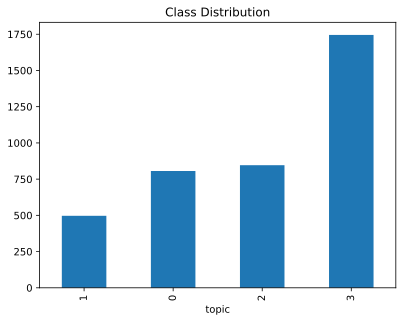

In [33]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
data['topic'].value_counts(ascending=True).plot.bar()
plt.title('Class Distribution')
plt.show()

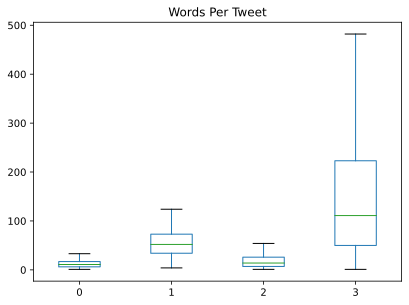

In [34]:
data['Words Per Tweet'] = data['questionText'].str.split().apply(len)
data.boxplot('Words Per Tweet', by='topic', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()


In [35]:
data = data.iloc[:, [0, 1]]
data.head()

,questionText,topic
0,Everyday is almost too much to bear.I left a p...,3
1,I wish my brother was successful when he tried...,3
2,I'm so gonna have to &quot;google&quot; the ne...,0
3,"I love him so much, and I don't know what to do.",1
4,Hope completely goneOk just got the last bit o...,3


In [36]:
#text cleaning
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('im')

def text_clean(txt):
  txt = txt.lower()
  cleaned_text = re.sub(r'[@#][^ \t\r\n]+', '', txt)
  tokens = cleaned_text.split()
  filter = [w for w in tokens if not w in stop_words]
  url = re.compile(r'https?://\S+|www\.\S+')

  for each_word in range(len(filter)):
    filter[each_word] = url.sub(r'', filter[each_word])
    filter[each_word] = re.sub("\'", "", filter[each_word])

  clean = " ".join(filter)

  return clean

data['questionText'] = data['questionText'].apply(lambda x : text_clean(x))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
data.tail()

,questionText,topic
3889,"legal guardianship grandson. acting out, wants...",1
3890,"lost live anymore,im going kill 2 hour 15 mint...",3
3891,ive gone couple therapy sessions far still eve...,2
3892,see other?,1
3893,well least get celebrate twice right? hehe,0


In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [39]:
train.head()

,questionText,topic
0,snap easy push people away. need help push boy...,1
1,"someone read leave goodthe plan ready, ready a...",3
2,feel lazy numb. interest things.,3
3,"10 months in, cant find work anywhere want fuc...",3
4,grandma stroke passed away recently. lost home...,3


In [40]:
test.head()

,questionText,topic
0,"days im restless want sleep. go sleep, realize...",2
1,can.why given life? fair given life suffering ...,3
2,"girlfriend suicidal. help.i know do, suicidal ...",3
3,ive become jaded cant control thoughts. cannot...,3
4,uttered one word boyfriend days. im know appro...,1


In [41]:
from datasets import Dataset
train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)
train_data

Dataset({
    features: ['questionText', 'topic'],
    num_rows: 3504
})

In [42]:
test_data

Dataset({
    features: ['questionText', 'topic'],
    num_rows: 390
})

In [75]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [134]:
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import torch.nn as nn

MAX_LEN = 512
TRAIN_BATCH_SIZE = 3
VALID_BATCH_SIZE = 3
EPOCHS = 3
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

In [135]:
class mental_dataset(Dataset):
  def __init__(self, data, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = data
        self.text = data['questionText']
        self.targets = self.data['topic']
        self.max_len = max_len

  def __len__(self):
      return len(self.text)

  def __getitem__(self, index):
      text = str(self.text[index])
      text = " ".join(text.split())

      inputs = self.tokenizer.encode_plus(
          text,
          None,
          add_special_tokens=True,
          max_length=self.max_len,
          pad_to_max_length=True,
          truncation = True,
          return_token_type_ids=True
      )

      ids = inputs['input_ids']
      mask = inputs['attention_mask']
      token_type_ids = inputs["token_type_ids"]


      return {
          'ids': torch.tensor(ids, dtype=torch.long),
          'mask': torch.tensor(mask, dtype=torch.long),
          'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
          'targets': torch.tensor(self.targets[index], dtype=torch.float)
      }

In [136]:
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = mental_dataset(train_data, tokenizer, MAX_LEN)
testing_set = mental_dataset(test_data, tokenizer, MAX_LEN)

TRAIN Dataset: (3504, 2)
TEST Dataset: (390, 2)


In [137]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [138]:
class DistilBERT(nn.Module):
  def __init__(self):
        super(DistilBERT, self).__init__()

        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = nn.Linear(768, 768)
        #self.dropout = nn.Dropout(0.4)
        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Linear(768, 4)

  def forward(self, input_ids, attention_mask, token_type_ids):
      output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
      hidden_state = output_1[0]
      pooler = hidden_state[:, 0]
      pooler = self.pre_classifier(pooler)
      pooler = nn.Tanh()(pooler)
      pooler = self.dropout(pooler)
      output = self.classifier(pooler)
      return output

model = DistilBERT()
model.to(device)

DistilBERT(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_feat

In [139]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score

def calcuate_accuracy(y_pred, y_true):
    correct = torch.sum(y_true == y_pred).item()
    return correct

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

def train(epoch):
    model.train()
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0

    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        targets = targets.type(torch.LongTensor).to(device)


        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()

        softmax_probs = torch.softmax(outputs.data, dim=1)
        pred_prob, pred_label = torch.max(softmax_probs, dim=1)
        n_correct += calcuate_accuracy(pred_label, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)

        if _%500==0:
          loss_step = tr_loss/nb_tr_steps
          accu_step = (n_correct*100)/nb_tr_examples
          print(f"Training Loss per 500 steps: {loss_step}")
          print(f"Training Accuracy per 500 steps: {accu_step}")

        loss.backward()
        optimizer.step()

for epoch in range(EPOCHS):
    print("Epoch: ", epoch)
    train(epoch)

Epoch:  0


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
1it [00:00,  9.10it/s]

Training Loss per 500 steps: 1.5976146459579468
Training Accuracy per 500 steps: 0.0


502it [01:16,  6.64it/s]

Training Loss per 500 steps: 0.6402643745255744
Training Accuracy per 500 steps: 76.38057218895543


1002it [02:33,  6.59it/s]

Training Loss per 500 steps: 0.4832950700474503
Training Accuracy per 500 steps: 82.75058275058275


1168it [02:58,  6.55it/s]


Epoch:  1


1it [00:00,  6.89it/s]

Training Loss per 500 steps: 0.026541849598288536
Training Accuracy per 500 steps: 100.0


502it [01:16,  5.46it/s]

Training Loss per 500 steps: 0.19576781087772485
Training Accuracy per 500 steps: 93.812375249501


1002it [02:32,  6.63it/s]

Training Loss per 500 steps: 0.19153382985542838
Training Accuracy per 500 steps: 93.77289377289377


1168it [02:57,  6.57it/s]


Epoch:  2


1it [00:00,  7.14it/s]

Training Loss per 500 steps: 0.04066568613052368
Training Accuracy per 500 steps: 100.0


502it [01:16,  6.57it/s]

Training Loss per 500 steps: 0.10473091333329365
Training Accuracy per 500 steps: 96.87292082501664


1002it [02:32,  6.58it/s]

Training Loss per 500 steps: 0.11466227099171501
Training Accuracy per 500 steps: 96.17049617049616


1168it [02:57,  6.57it/s]


In [140]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            softmax_probs = torch.softmax(outputs.data, dim=1)
            pred_prob, pred_label = torch.max(softmax_probs, dim=1)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(pred_label.cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [141]:
output, target = validation(testing_loader)

130it [00:06, 18.74it/s]


Accuracy: 0.9051282051282051
F1 Score: 0.8886842635920976


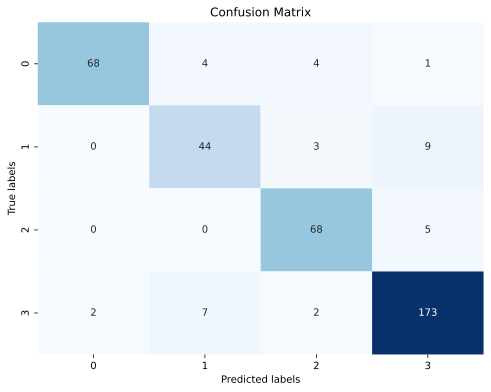

In [142]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy = accuracy_score(target, output)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(target, output, average='macro')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(target, output)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [143]:
output, target = validation(training_loader)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
1168it [01:02, 18.68it/s]


Accuracy: 0.9897260273972602
F1 Score: 0.9864827998815758


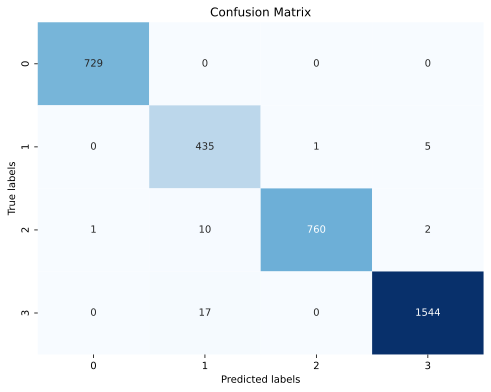

In [144]:
accuracy = accuracy_score(target, output)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(target, output, average='macro')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(target, output)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [145]:
PATH = "distlbert_mental_classifier.pt"
torch.save(model, PATH)

In [146]:
model = torch.load(PATH, map_location=torch.device('cpu'))
model.eval()

DistilBERT(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_feat